<a href="https://colab.research.google.com/github/ImAli0/ML_and_DataScience/blob/main/11-Logistic-Regression-Models/00_My_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_recall_curve, PrecisionRecallDisplay, RocCurveDisplay

# Data

In [ ]:
df = pd.read_csv('/content/hearing_test.csv')
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


import numpy as np
from google.colab import autoviz
df_1035830594806689088 = autoviz.get_df('df_1035830594806689088')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1035830594806689088, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1035830594806689088 = autoviz.get_df('df_1035830594806689088')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1035830594806689088, *['physical_score'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1035830594806689088 = autoviz.get_df('df_1035830594806689088')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1035830594806689088, *['test_result'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1035830594806689088 = autoviz.get_df('df_1035830594806689088')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1035830594806689088, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1035830594806689088 = autoviz.get_df('df_1035830594806689088')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1035830594806689088, *['physical_score'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1035830594806689088 = autoviz.get_df('df_1035830594806689088')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1035830594806689088, *['test_result'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1035830594806689088 = autoviz.get_df('df_1035830594806689088')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_1035830594806689088, *[[['age', 'physical_score'], ['physical_score', 'test_result']]], **{})
chart

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [ ]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


import numpy as np
from google.colab import autoviz
df_4438028884664926731 = autoviz.get_df('df_4438028884664926731')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4438028884664926731, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4438028884664926731 = autoviz.get_df('df_4438028884664926731')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4438028884664926731, *['physical_score'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4438028884664926731 = autoviz.get_df('df_4438028884664926731')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4438028884664926731, *['test_result'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4438028884664926731 = autoviz.get_df('df_4438028884664926731')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4438028884664926731, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4438028884664926731 = autoviz.get_df('df_4438028884664926731')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4438028884664926731, *['physical_score'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4438028884664926731 = autoviz.get_df('df_4438028884664926731')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4438028884664926731, *['test_result'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4438028884664926731 = autoviz.get_df('df_4438028884664926731')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_4438028884664926731, *[[['age', 'physical_score'], ['physical_score', 'test_result']]], **{})
chart

In [ ]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

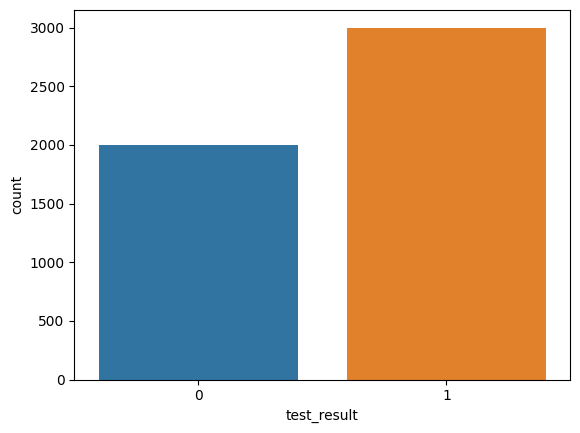

In [ ]:
sns.countplot(data=df, x='test_result')

<Axes: xlabel='test_result', ylabel='age'>

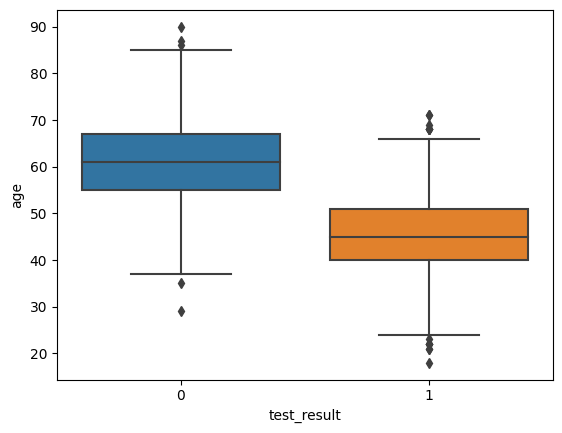

In [ ]:
sns.boxplot(df,x='test_result',y='age')

<Axes: xlabel='test_result', ylabel='physical_score'>

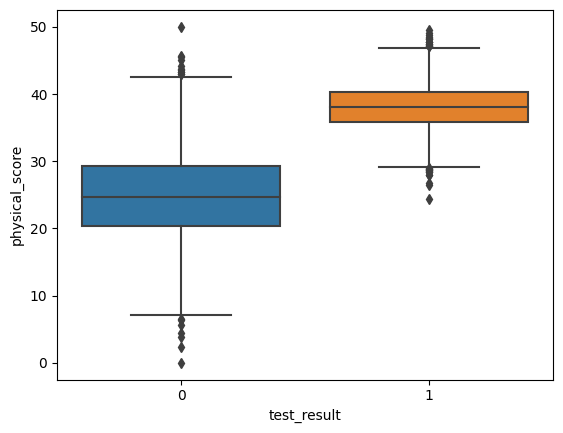

In [ ]:
sns.boxplot(df, x='test_result', y='physical_score')

<Axes: xlabel='age', ylabel='physical_score'>

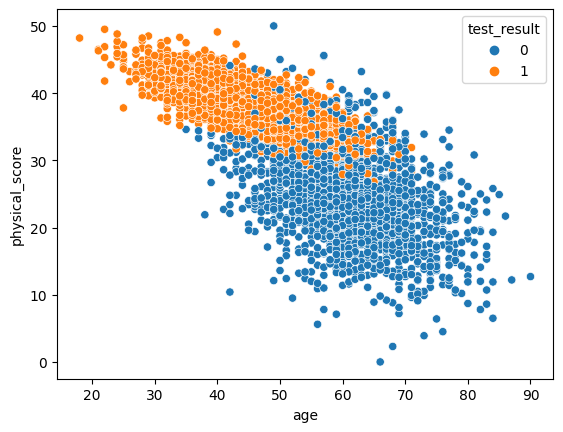

In [ ]:
sns.scatterplot(df, x='age', y='physical_score', hue='test_result')

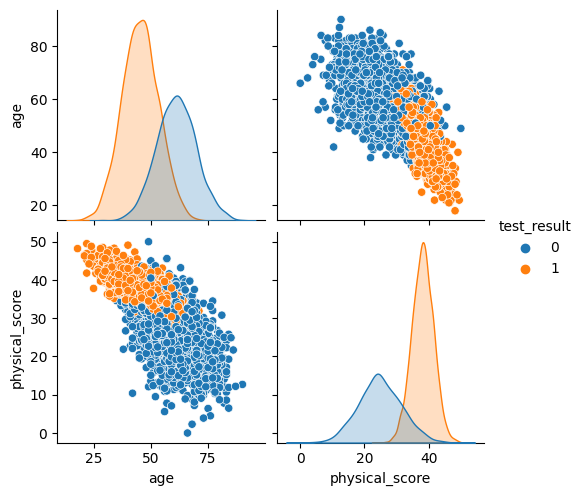

In [ ]:
sns.pairplot(df, hue='test_result')

<Axes: >

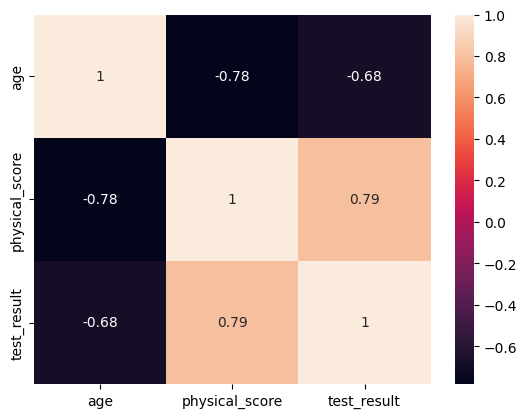

In [ ]:
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='physical_score', ylabel='test_result'>

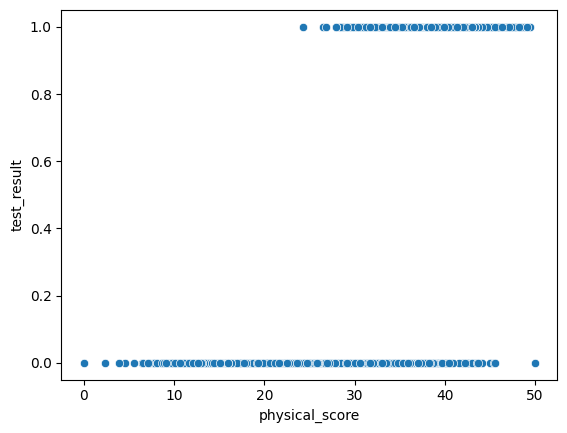

In [ ]:
sns.scatterplot(df, x='physical_score', y='test_result')

<Axes: xlabel='age', ylabel='test_result'>

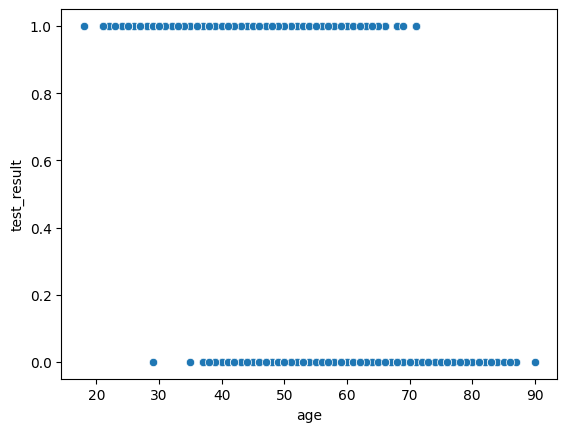

In [ ]:
sns.scatterplot(df, x='age', y='test_result')

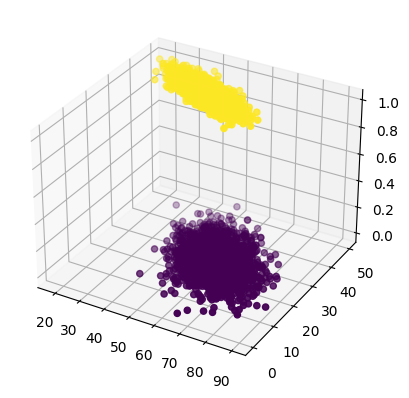

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])


# Train | Test Split and Scaling

In [ ]:
X = df.drop('test_result', axis=1)
y = df['test_result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Logistic Regression Model

In [ ]:
log_model = LogisticRegression()
log_model.fit(scaled_X_train, y_train)
log_model.coef_

array([[-0.86716207,  3.50195195]])

# Model Performance on Classification Tasks

In [ ]:
y_pred = log_model.predict(scaled_X_test)
accuracy_score(y_test, y_pred)

0.914

In [36]:
confusion_matrix(y_test, y_pred)

array([[172,  34],
       [  9, 285]])

In [59]:
#help(ConfusionMatrixDisplay)

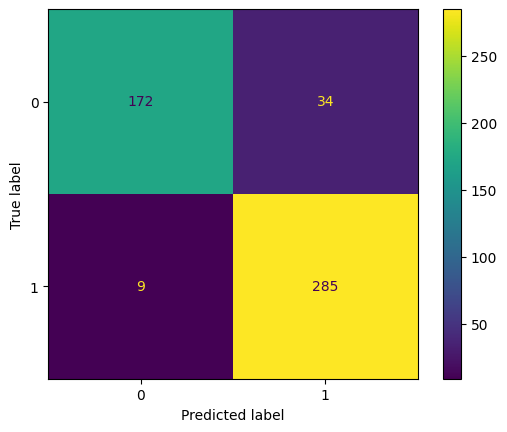

In [37]:
ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test)

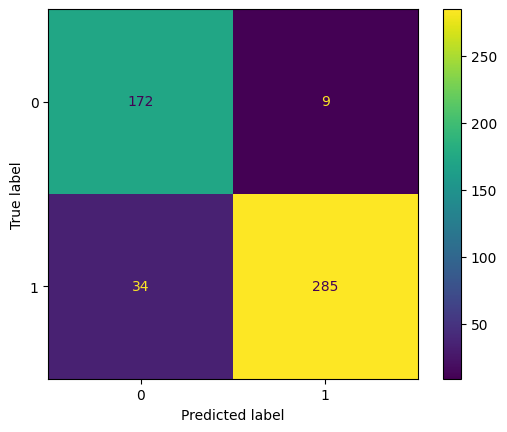

In [38]:
ConfusionMatrixDisplay.from_predictions(y_pred, y_test)

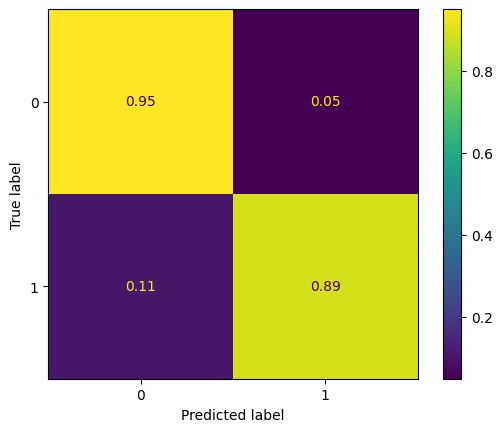

In [41]:
ConfusionMatrixDisplay.from_predictions(y_pred, y_test, normalize='true')

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89       206
           1       0.89      0.97      0.93       294

    accuracy                           0.91       500
   macro avg       0.92      0.90      0.91       500
weighted avg       0.92      0.91      0.91       500



In [58]:
#help(classification_report)

In [48]:
X_train.iloc[0]

age               49.0
physical_score    30.1
Name: 3871, dtype: float64

In [50]:
y_train.iloc[0]

0

In [52]:
log_model.predict_proba(X_train.iloc[0].values.reshape(1,-1))

array([[0., 1.]])

In [56]:
log_model.predict(X_train.iloc[0].values.reshape(1,-1))

array([1])

In [65]:
#help(PrecisionRecallDisplay)

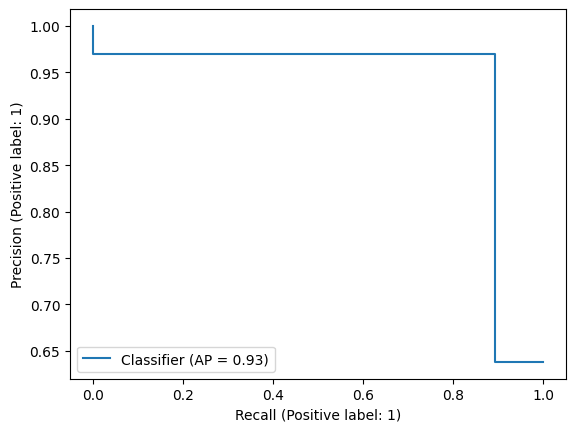

In [66]:
PrecisionRecallDisplay.from_predictions(y_pred, y_test)

In [68]:
#help(precision_recall_curve)

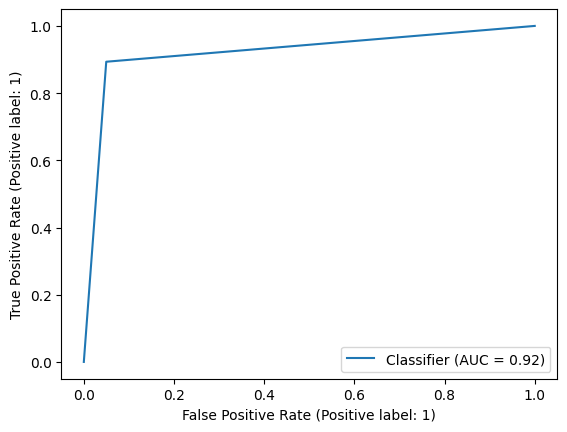

In [69]:
RocCurveDisplay.from_predictions(y_pred, y_test)